In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# !pip install xgboost

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, f1_score, recall_score,roc_curve,auc,roc_auc_score


In [2]:
df=pd.read_csv('2019-Oct.csv')

In [3]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [6]:
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [7]:
df2=df.dropna()

In [8]:
df2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
...,...,...,...,...,...,...,...,...,...
42448757,2019-10-31 23:59:58 UTC,view,1004870,2053013555631882655,electronics.smartphone,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212
42448758,2019-10-31 23:59:58 UTC,view,2702331,2053013563911439225,appliances.kitchen.refrigerators,lg,527.43,524356542,153f9818-4d32-4e8b-ba9f-f355094e8ae4
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd


In [9]:
df2.isna().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [11]:
df2['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [12]:
df2['event_type'].value_counts()

view        25201706
cart          809407
purchase      549507
Name: event_type, dtype: int64

In [13]:
cart_samples=df2[df2['event_type']=='cart'].sample(n=260000)

In [14]:
cart_samples

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
37869325,2019-10-28 08:12:52 UTC,cart,1003317,2053013555631882655,electronics.smartphone,apple,947.26,536607733,8ae50488-c285-4c73-a128-7fdb1acf543e
16425820,2019-10-13 09:34:06 UTC,cart,4700478,2053013560899928785,auto.accessories.videoregister,sho-me,142.49,514932903,7f129f25-262d-408a-9ed7-e168de5948fd
21011816,2019-10-16 09:33:15 UTC,cart,6300883,2053013554834964853,appliances.kitchen.kettle,tefal,33.44,518422510,fe7f055e-9955-4129-8904-fe0451f246ee
19642150,2019-10-15 11:28:17 UTC,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.45,560448736,cb35716f-492c-4d25-80c9-3acd309e9f06
37296953,2019-10-27 17:35:49 UTC,cart,2700609,2053013563911439225,appliances.kitchen.refrigerators,indesit,314.01,536825325,8f4864fa-2dc1-48c5-8600-7671db2d4ec5
...,...,...,...,...,...,...,...,...,...
34954222,2019-10-26 05:02:02 UTC,cart,1004250,2053013555631882655,electronics.smartphone,apple,782.98,548449854,f31365d9-6c31-42b5-981b-67e2ff5027f4
1614117,2019-10-02 08:12:57 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.30,513208494,bc38399e-c76a-4bdb-b6b1-b37feb4deff9
17640390,2019-10-14 05:03:18 UTC,cart,1004838,2053013555631882655,electronics.smartphone,oppo,179.85,541617732,24f50380-56aa-428b-99d2-70a502ae3ffc
4892313,2019-10-04 19:10:24 UTC,cart,1004708,2053013555631882655,electronics.smartphone,huawei,153.87,543191578,980bd933-2ae0-4690-9bc3-1fbc1512b23e


In [15]:
view_samples=df2[df2['event_type']=='view'].sample(n=260000)

In [16]:
purchase_samples=df2[df2['event_type']=='purchase']

In [17]:
new_df= pd.concat([purchase_samples,view_samples,cart_samples], ignore_index=True)

In [18]:
new_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
3,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
4,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
...,...,...,...,...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,1004250,2053013555631882655,electronics.smartphone,apple,782.98,548449854,f31365d9-6c31-42b5-981b-67e2ff5027f4
1069503,2019-10-02 08:12:57 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.30,513208494,bc38399e-c76a-4bdb-b6b1-b37feb4deff9
1069504,2019-10-14 05:03:18 UTC,cart,1004838,2053013555631882655,electronics.smartphone,oppo,179.85,541617732,24f50380-56aa-428b-99d2-70a502ae3ffc
1069505,2019-10-04 19:10:24 UTC,cart,1004708,2053013555631882655,electronics.smartphone,huawei,153.87,543191578,980bd933-2ae0-4690-9bc3-1fbc1512b23e


In [19]:
new_df.to_csv('new_data.csv')

In [46]:
import pandas as pd

In [47]:
dt=pd.read_csv('new_data.csv')

In [48]:
# dt=dt.drop_duplicates()

In [49]:
dt.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [50]:
ndt=dt[['event_time', 'event_type', 'category_code', 'brand', 'price']]

In [51]:
ndt

,event_time,event_type,category_code,brand,price
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91
4,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98
...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,electronics.smartphone,apple,782.98
1069503,2019-10-02 08:12:57 UTC,cart,electronics.smartphone,samsung,174.30
1069504,2019-10-14 05:03:18 UTC,cart,electronics.smartphone,oppo,179.85
1069505,2019-10-04 19:10:24 UTC,cart,electronics.smartphone,huawei,153.87


In [52]:
ndt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069507 entries, 0 to 1069506
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1069507 non-null  object 
 1   event_type     1069507 non-null  object 
 2   category_code  1069507 non-null  object 
 3   brand          1069507 non-null  object 
 4   price          1069507 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.8+ MB


In [53]:
ndt['date_column'] = pd.to_datetime(ndt['event_time'],  utc=True)

C:\Users\ovisual\AppData\Local\Temp\ipykernel_16304\1437693088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndt['date_column'] = pd.to_datetime(ndt['event_time'],  utc=True)


In [55]:
ndt

,event_time,event_type,category_code,brand,price,date_column
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76,2019-10-01 00:02:14+00:00
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69,2019-10-01 00:04:37+00:00
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42,2019-10-01 00:07:07+00:00
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26+00:00
4,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54+00:00
...,...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,electronics.smartphone,apple,782.98,2019-10-26 05:02:02+00:00
1069503,2019-10-02 08:12:57 UTC,cart,electronics.smartphone,samsung,174.30,2019-10-02 08:12:57+00:00
1069504,2019-10-14 05:03:18 UTC,cart,electronics.smartphone,oppo,179.85,2019-10-14 05:03:18+00:00
1069505,2019-10-04 19:10:24 UTC,cart,electronics.smartphone,huawei,153.87,2019-10-04 19:10:24+00:00


In [56]:
ndt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069507 entries, 0 to 1069506
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   event_time     1069507 non-null  object             
 1   event_type     1069507 non-null  object             
 2   category_code  1069507 non-null  object             
 3   brand          1069507 non-null  object             
 4   price          1069507 non-null  float64            
 5   date_column    1069507 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 49.0+ MB


In [57]:
ndt['day_name'] = ndt['date_column'].dt.day_name()
ndt['time'] = ndt['date_column'].dt.time

C:\Users\ovisual\AppData\Local\Temp\ipykernel_16304\48722217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndt['day_name'] = ndt['date_column'].dt.day_name()
C:\Users\ovisual\AppData\Local\Temp\ipykernel_16304\48722217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndt['time'] = ndt['date_column'].dt.time


In [58]:
ndt

,event_time,event_type,category_code,brand,price,date_column,day_name,time
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76,2019-10-01 00:02:14+00:00,Tuesday,00:02:14
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69,2019-10-01 00:04:37+00:00,Tuesday,00:04:37
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42,2019-10-01 00:07:07+00:00,Tuesday,00:07:07
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26+00:00,Tuesday,00:09:26
4,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54+00:00,Tuesday,00:09:54
...,...,...,...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,electronics.smartphone,apple,782.98,2019-10-26 05:02:02+00:00,Saturday,05:02:02
1069503,2019-10-02 08:12:57 UTC,cart,electronics.smartphone,samsung,174.30,2019-10-02 08:12:57+00:00,Wednesday,08:12:57
1069504,2019-10-14 05:03:18 UTC,cart,electronics.smartphone,oppo,179.85,2019-10-14 05:03:18+00:00,Monday,05:03:18
1069505,2019-10-04 19:10:24 UTC,cart,electronics.smartphone,huawei,153.87,2019-10-04 19:10:24+00:00,Friday,19:10:24


In [59]:
ndt['hour'] = ndt['date_column'].dt.hour

C:\Users\ovisual\AppData\Local\Temp\ipykernel_16304\988640267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndt['hour'] = ndt['date_column'].dt.hour


In [60]:
ndt

,event_time,event_type,category_code,brand,price,date_column,day_name,time,hour
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76,2019-10-01 00:02:14+00:00,Tuesday,00:02:14,0
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69,2019-10-01 00:04:37+00:00,Tuesday,00:04:37,0
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42,2019-10-01 00:07:07+00:00,Tuesday,00:07:07,0
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26+00:00,Tuesday,00:09:26,0
4,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54+00:00,Tuesday,00:09:54,0
...,...,...,...,...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,electronics.smartphone,apple,782.98,2019-10-26 05:02:02+00:00,Saturday,05:02:02,5
1069503,2019-10-02 08:12:57 UTC,cart,electronics.smartphone,samsung,174.30,2019-10-02 08:12:57+00:00,Wednesday,08:12:57,8
1069504,2019-10-14 05:03:18 UTC,cart,electronics.smartphone,oppo,179.85,2019-10-14 05:03:18+00:00,Monday,05:03:18,5
1069505,2019-10-04 19:10:24 UTC,cart,electronics.smartphone,huawei,153.87,2019-10-04 19:10:24+00:00,Friday,19:10:24,19


In [61]:
def categorize_time(hour):
    if 6 <= hour < 18:
        return 'Day'
    else:
        return 'Night'

ndt['time_category'] = ndt['hour'].apply(categorize_time)


In [62]:
ndt

,event_time,event_type,category_code,brand,price,date_column,day_name,time,hour,time_category
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76,2019-10-01 00:02:14+00:00,Tuesday,00:02:14,0,Night
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69,2019-10-01 00:04:37+00:00,Tuesday,00:04:37,0,Night
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42,2019-10-01 00:07:07+00:00,Tuesday,00:07:07,0,Night
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26+00:00,Tuesday,00:09:26,0,Night
4,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54+00:00,Tuesday,00:09:54,0,Night
...,...,...,...,...,...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,electronics.smartphone,apple,782.98,2019-10-26 05:02:02+00:00,Saturday,05:02:02,5,Night
1069503,2019-10-02 08:12:57 UTC,cart,electronics.smartphone,samsung,174.30,2019-10-02 08:12:57+00:00,Wednesday,08:12:57,8,Day
1069504,2019-10-14 05:03:18 UTC,cart,electronics.smartphone,oppo,179.85,2019-10-14 05:03:18+00:00,Monday,05:03:18,5,Night
1069505,2019-10-04 19:10:24 UTC,cart,electronics.smartphone,huawei,153.87,2019-10-04 19:10:24+00:00,Friday,19:10:24,19,Night


In [63]:
ndt['category_code'].unique()

array(['electronics.smartphone', 'furniture.bathroom.toilet',
       'electronics.audio.headphone', 'appliances.environment.air_heater',
       'auto.accessories.videoregister', 'computers.notebook',
       'computers.peripherals.printer', 'electronics.clocks',
       'apparel.shoes', 'computers.components.hdd',
       'appliances.kitchen.meat_grinder', 'electronics.telephone',
       'appliances.kitchen.blender', 'construction.tools.drill',
       'accessories.bag', 'electronics.video.tv', 'electronics.tablet',
       'appliances.kitchen.washer', 'appliances.environment.vacuum',
       'appliances.environment.water_heater',
       'appliances.kitchen.refrigerators',
       'appliances.personal.hair_cutter', 'appliances.kitchen.hood',
       'stationery.cartrige', 'furniture.kitchen.table',
       'apparel.trousers', 'appliances.personal.scales',
       'appliances.kitchen.toster', 'kids.fmcg.diapers',
       'computers.components.memory', 'appliances.sewing_machine',
       'auto.acce

In [64]:
category_mapping = {
    'electronics': 'Electronics',
    'furniture': 'Furniture',
    'appliances': 'Appliances',
    'computers': 'Computers',
    'auto': 'Auto',
    'apparel':'Apparel',
    'construction':'construction',
    'sport':'sport'
}

In [65]:
ndt['main_category'] = ndt['category_code'].apply(lambda x: category_mapping.get(x.split('.')[0], 'Other'))


In [66]:
ndt

,event_time,event_type,category_code,brand,price,date_column,day_name,time,hour,time_category,main_category
0,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76,2019-10-01 00:02:14+00:00,Tuesday,00:02:14,0,Night,Electronics
1,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69,2019-10-01 00:04:37+00:00,Tuesday,00:04:37,0,Night,Electronics
2,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42,2019-10-01 00:07:07+00:00,Tuesday,00:07:07,0,Night,Furniture
3,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26+00:00,Tuesday,00:09:26,0,Night,Electronics
4,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54+00:00,Tuesday,00:09:54,0,Night,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
1069502,2019-10-26 05:02:02 UTC,cart,electronics.smartphone,apple,782.98,2019-10-26 05:02:02+00:00,Saturday,05:02:02,5,Night,Electronics
1069503,2019-10-02 08:12:57 UTC,cart,electronics.smartphone,samsung,174.30,2019-10-02 08:12:57+00:00,Wednesday,08:12:57,8,Day,Electronics
1069504,2019-10-14 05:03:18 UTC,cart,electronics.smartphone,oppo,179.85,2019-10-14 05:03:18+00:00,Monday,05:03:18,5,Night,Electronics
1069505,2019-10-04 19:10:24 UTC,cart,electronics.smartphone,huawei,153.87,2019-10-04 19:10:24+00:00,Friday,19:10:24,19,Night,Electronics


In [67]:
ndt.columns

Index(['event_time', 'event_type', 'category_code', 'brand', 'price',
       'date_column', 'day_name', 'time', 'hour', 'time_category',
       'main_category'],
      dtype='object')

In [68]:
fdt=ndt[['brand', 'price','day_name', 'time_category','main_category', 'event_type']]

In [69]:
fdt

,brand,price,day_name,time_category,main_category,event_type
0,samsung,130.76,Tuesday,Night,Electronics,purchase
1,apple,642.69,Tuesday,Night,Electronics,purchase
2,santeri,54.42,Tuesday,Night,Furniture,purchase
3,apple,189.91,Tuesday,Night,Electronics,purchase
4,apple,161.98,Tuesday,Night,Electronics,purchase
...,...,...,...,...,...,...
1069502,apple,782.98,Saturday,Night,Electronics,cart
1069503,samsung,174.30,Wednesday,Day,Electronics,cart
1069504,oppo,179.85,Monday,Night,Electronics,cart
1069505,huawei,153.87,Friday,Night,Electronics,cart


In [70]:
custom_day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Map day names to custom numbers
fdt['day_number'] = fdt['day_name'].map(custom_day_mapping)

C:\Users\ovisual\AppData\Local\Temp\ipykernel_16304\607224863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdt['day_number'] = fdt['day_name'].map(custom_day_mapping)


In [71]:
fdt

,brand,price,day_name,time_category,main_category,event_type,day_number
0,samsung,130.76,Tuesday,Night,Electronics,purchase,2
1,apple,642.69,Tuesday,Night,Electronics,purchase,2
2,santeri,54.42,Tuesday,Night,Furniture,purchase,2
3,apple,189.91,Tuesday,Night,Electronics,purchase,2
4,apple,161.98,Tuesday,Night,Electronics,purchase,2
...,...,...,...,...,...,...,...
1069502,apple,782.98,Saturday,Night,Electronics,cart,6
1069503,samsung,174.30,Wednesday,Day,Electronics,cart,3
1069504,oppo,179.85,Monday,Night,Electronics,cart,1
1069505,huawei,153.87,Friday,Night,Electronics,cart,5


In [73]:
fdt['time_category'].unique()

array(['Night', 'Day'], dtype=object)

In [74]:
fdt['period']=fdt['time_category'].replace({'Day':'1', 'Night':'0'})

C:\Users\ovisual\AppData\Local\Temp\ipykernel_16304\2416875190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdt['period']=fdt['time_category'].replace({'Day':'1', 'Night':'0'})


In [75]:
fdt

,brand,price,day_name,time_category,main_category,event_type,day_number,period
0,samsung,130.76,Tuesday,Night,Electronics,purchase,2,0
1,apple,642.69,Tuesday,Night,Electronics,purchase,2,0
2,santeri,54.42,Tuesday,Night,Furniture,purchase,2,0
3,apple,189.91,Tuesday,Night,Electronics,purchase,2,0
4,apple,161.98,Tuesday,Night,Electronics,purchase,2,0
...,...,...,...,...,...,...,...,...
1069502,apple,782.98,Saturday,Night,Electronics,cart,6,0
1069503,samsung,174.30,Wednesday,Day,Electronics,cart,3,1
1069504,oppo,179.85,Monday,Night,Electronics,cart,1,0
1069505,huawei,153.87,Friday,Night,Electronics,cart,5,0


In [76]:
final_data=fdt.to_csv('final_data.csv')

In [1]:
import pandas as pd

In [3]:
fdt=pd.read_csv('final_data.csv')

In [4]:
dd=pd.read_csv('final_data2020.csv')

In [5]:
fdt=pd.concat([fdt, dd], ignore_index=True)

In [6]:
fdt=fdt.drop('Unnamed: 0', axis=1)

In [7]:
fdt

,brand,price,day_name,time_category,main_category,event_type,day_number,period
0,samsung,130.76,Tuesday,Night,Electronics,purchase,2,0
1,apple,642.69,Tuesday,Night,Electronics,purchase,2,0
2,santeri,54.42,Tuesday,Night,Furniture,purchase,2,0
3,apple,189.91,Tuesday,Night,Electronics,purchase,2,0
4,apple,161.98,Tuesday,Night,Electronics,purchase,2,0
...,...,...,...,...,...,...,...,...
2644886,versace,48.91,Monday,Day,Apparel,cart,1,1
2644887,glo,25.74,Saturday,Day,Apparel,cart,6,1
2644888,apple,553.17,Wednesday,Day,Electronics,cart,3,1
2644889,omron,64.24,Wednesday,Day,Apparel,cart,3,1


In [9]:
fdt['event_type'].value_counts(normalize=True)

purchase    0.606789
view        0.196605
cart        0.196605
Name: event_type, dtype: float64

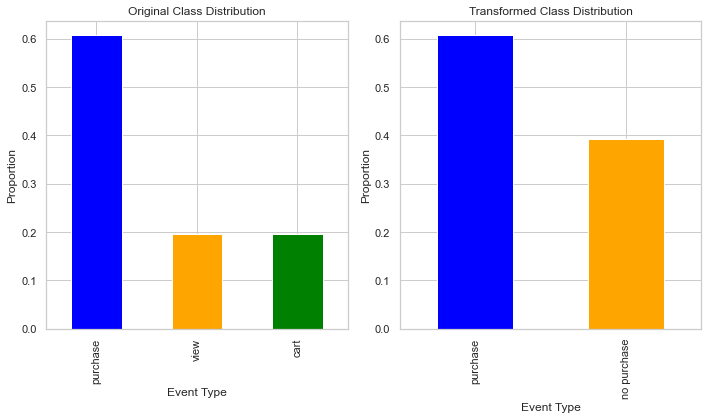

In [12]:


# Plotting style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Original class distribution
plt.subplot(1, 2, 1)
original_dist = fdt['event_type'].value_counts(normalize=True)
original_dist.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Original Class Distribution')
plt.xlabel('Event Type')
plt.ylabel('Proportion')

# Convert to binary classes (purchase and no purchase)
fdt['event_type'] = fdt['event_type'].apply(lambda x: 'purchase' if x == 'purchase' else 'no purchase')

# Transformed class distribution
plt.subplot(1, 2, 2)
transformed_dist = fdt['event_type'].value_counts(normalize=True)
transformed_dist.plot(kind='bar', color=['blue', 'orange'])
plt.title('Transformed Class Distribution')
plt.xlabel('Event Type')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


<AxesSubplot:>

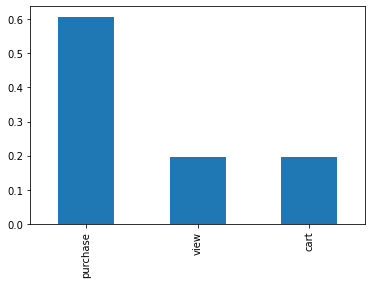

In [11]:
fdt['event_type'].value_counts(normalize=True).plot(kind='bar')

In [10]:
# for i in fdt['brand'].unique():
#     print(i)

In [11]:
fdt['brand'].value_counts().head(10)

samsung    686056
apple      612801
xiaomi     259036
huawei     105212
oppo        47630
lg          36964
lucente     32005
acer        31950
sony        23288
lenovo      21531
Name: brand, dtype: int64

In [12]:
fdt['brand'].unique()

array(['samsung', 'apple', 'santeri', ..., 'viviennesabo',
       'marcotozzipremio', 'alfreddunhill'], dtype=object)

In [13]:
keep_values = ['samsung', 'apple', 'xiaomi', 'huawei', 'oppo','lg', 'acer','indesit', 'elenberg']


# # Replace other unique values with 'others'
# other_values = fdt['brand'].unique()
# for value in other_values:
#     if value not in keep_values:
#         fdt['brand'] = fdt['brand'].replace(value, 'others')

fdt=fdt[fdt['brand'].isin(keep_values)]

In [14]:
fdt['brand'].unique()

array(['samsung', 'apple', 'xiaomi', 'huawei', 'lg', 'acer', 'oppo',
       'indesit', 'elenberg'], dtype=object)

In [15]:
fdt

,brand,price,day_name,time_category,main_category,event_type,day_number,period
0,samsung,130.76,Tuesday,Night,Electronics,purchase,2,0
1,apple,642.69,Tuesday,Night,Electronics,purchase,2,0
3,apple,189.91,Tuesday,Night,Electronics,purchase,2,0
4,apple,161.98,Tuesday,Night,Electronics,purchase,2,0
5,apple,515.67,Tuesday,Night,Electronics,purchase,2,0
...,...,...,...,...,...,...,...,...
2644880,apple,294.21,Sunday,Day,Electronics,cart,7,1
2644881,xiaomi,278.92,Saturday,Day,construction,cart,6,1
2644885,oppo,173.82,Sunday,Day,construction,cart,7,1
2644888,apple,553.17,Wednesday,Day,Electronics,cart,3,1


In [16]:
columns_to_encode = ['brand','main_category']

# Apply one-hot encoding and retain the original DataFrame
encoded_df = pd.get_dummies(fdt, columns=columns_to_encode, drop_first=True)

In [17]:
def binarize_event_type(event):
    return 1 if event == 'purchase' else 0

# Apply the binarization function to the 'event_type' column
encoded_df['event_binarized'] = encoded_df['event_type'].apply(binarize_event_type)

In [18]:
encoded_df=encoded_df.drop(columns=['event_type','day_name','time_category'], axis=1)


In [19]:
# encoded_df=encoded_df.drop_duplicates()

In [20]:
encoded_df

,price,day_number,period,brand_apple,brand_elenberg,brand_huawei,brand_indesit,brand_lg,brand_oppo,brand_samsung,brand_xiaomi,main_category_Appliances,main_category_Auto,main_category_Computers,main_category_Electronics,main_category_Furniture,main_category_Other,main_category_construction,main_category_sport,event_binarized
0,130.76,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,642.69,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,189.91,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,161.98,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,515.67,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644880,294.21,7,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2644881,278.92,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2644885,173.82,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2644888,553.17,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
encoded_df.reset_index(inplace=True, drop=True)

In [22]:
# dd=pd.read_csv('encoded_df2020.csv')

In [23]:
# dd

In [24]:
encoded_df

,price,day_number,period,brand_apple,brand_elenberg,brand_huawei,brand_indesit,brand_lg,brand_oppo,brand_samsung,brand_xiaomi,main_category_Appliances,main_category_Auto,main_category_Computers,main_category_Electronics,main_category_Furniture,main_category_Other,main_category_construction,main_category_sport,event_binarized
0,130.76,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,642.69,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,189.91,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,161.98,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,515.67,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812378,294.21,7,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1812379,278.92,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1812380,173.82,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1812381,553.17,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
X=encoded_df.drop(columns=['event_binarized'], axis=1)
y=encoded_df['event_binarized']

In [27]:
X

,price,day_number,period,brand_apple,brand_elenberg,brand_huawei,brand_indesit,brand_lg,brand_oppo,brand_samsung,brand_xiaomi,main_category_Appliances,main_category_Auto,main_category_Computers,main_category_Electronics,main_category_Furniture,main_category_Other,main_category_construction,main_category_sport
0,130.76,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,642.69,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,189.91,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,161.98,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,515.67,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812378,294.21,7,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1812379,278.92,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1812380,173.82,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1812381,553.17,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [28]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1812378    0
1812379    0
1812380    0
1812381    0
1812382    0
Name: event_binarized, Length: 1812383, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the entire DataFrame
scaled_data = scaler.fit_transform(X)

# Create a new DataFrame with scaled values
X= pd.DataFrame(scaled_data, columns=X.columns)

In [30]:
X

,price,day_number,period,brand_apple,brand_elenberg,brand_huawei,brand_indesit,brand_lg,brand_oppo,brand_samsung,brand_xiaomi,main_category_Appliances,main_category_Auto,main_category_Computers,main_category_Electronics,main_category_Furniture,main_category_Other,main_category_construction,main_category_sport
0,-0.773896,-1.018721,-1.623624,-0.714735,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,1.281305,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204
1,0.587560,-1.018721,-1.623624,1.399121,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204
2,-0.616589,-1.018721,-1.623624,1.399121,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204
3,-0.690868,-1.018721,-1.623624,1.399121,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204
4,0.249755,-1.018721,-1.623624,1.399121,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812378,-0.339208,1.507759,0.615906,1.399121,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204
1812379,-0.379871,1.002463,0.615906,-0.714735,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,2.448805,-0.271119,-0.021054,-0.103416,-0.852126,-0.066548,-0.052702,1.153373,-0.222204
1812380,-0.659380,1.507759,0.615906,-0.714735,-0.08865,-0.248253,-0.101835,-0.144291,6.086977,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,-0.852126,-0.066548,-0.052702,1.153373,-0.222204
1812381,0.349485,-0.513425,0.615906,1.399121,-0.08865,-0.248253,-0.101835,-0.144291,-0.164285,-0.780454,-0.408362,-0.271119,-0.021054,-0.103416,1.173536,-0.066548,-0.052702,-0.867022,-0.222204


In [31]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1812378    0
1812379    0
1812380    0
1812381    0
1812382    0
Name: event_binarized, Length: 1812383, dtype: int64

In [32]:
xtrain,xtest,ytrain,ytest=(train_test_split(X,y, test_size=0.2, random_state=42))

In [33]:
logr=LogisticRegression()

In [34]:
logr.fit(xtrain, ytrain)
LR_predictions = logr.predict(xtest)


In [37]:
lass_report = classification_report(ytest, LR_predictions)
print(lass_report)

              precision    recall  f1-score   support

           0       0.54      0.11      0.18    129687
           1       0.66      0.95      0.78    232790

    accuracy                           0.65    362477
   macro avg       0.60      0.53      0.48    362477
weighted avg       0.61      0.65      0.56    362477



In [38]:
coefficients = logr.coef_[0]
coefficients

array([-0.1132294 , -0.03513727,  0.00529759, -0.13168469, -0.06254176,
       -0.16621439, -0.07034603, -0.08378717, -0.10867142, -0.24818329,
       -0.28271436, -0.09331536, -0.01557045, -0.11656025, -0.27465095,
       -0.00110045, -0.02502765,  0.15509563, -0.00406971])

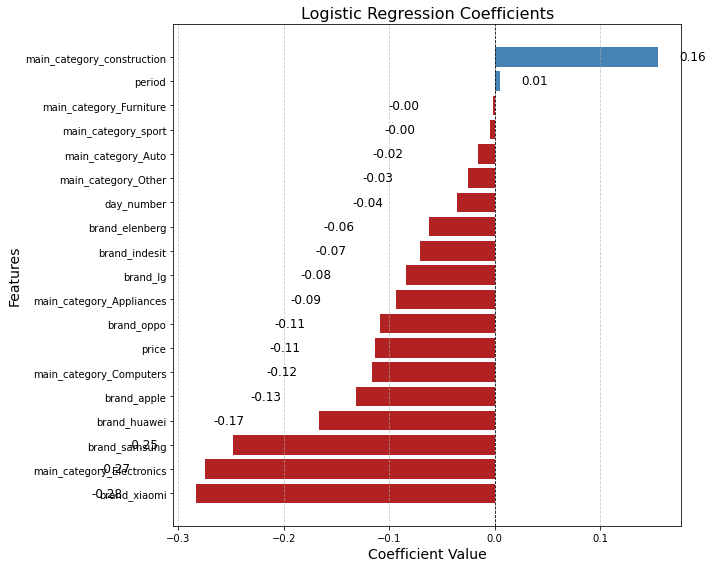

In [40]:


# Sample data (replace this with your actual data)
feature_names = X.columns

# Sort the coefficients and feature names
sorted_indices = np.argsort(coefficients)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = [coefficients[i] for i in sorted_indices]

# Create a color palette for positive and negative coefficients
colors = ['steelblue' if c > 0 else 'firebrick' for c in sorted_coefficients]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.barh(sorted_feature_names, sorted_coefficients, color=colors)

# Customize plot elements
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at zero
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add coefficient values on the bars
for bar, coef in zip(bars, sorted_coefficients):
    plt.text(bar.get_width() + 0.02 if coef > 0 else bar.get_width() - 0.1, 
             bar.get_y() + bar.get_height() / 2, 
             f'{coef:.2f}', 
             va='center', fontsize=12, color='black')

# Invert the y-axis to display the highest coefficient at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
LR_accuracy_score=accuracy_score(ytest,LR_predictions)
LR_precision=precision_score(ytest,LR_predictions)
LR_recall=recall_score(ytest,LR_predictions)
LR_f1_score=f1_score(ytest,LR_predictions)


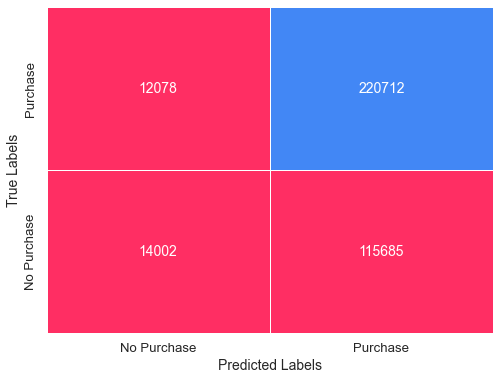

In [46]:


# Calculate the confusion matrix
cm = confusion_matrix(ytest, LR_predictions)

# Create a custom color palette mixing red and blue
colors = ["#ff2e63", "#4287f5"]  # Redish-pink for no purchase, Blue for purchase
cmap = sns.color_palette(colors)

# Create the confusion matrix heatmap with customized labels and colors
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'])  # Add customized x-axis labels
plt.yticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'])  # Add customized y-axis labels
plt.gca().invert_yaxis()  # Invert y-axis for intuitive visualization
plt.show()




In [47]:
decision_tree = DecisionTreeClassifier(random_state=42)


In [48]:
decision_tree.fit(xtrain, ytrain)


DecisionTreeClassifier(random_state=42)

In [49]:
Tree_predictions = decision_tree.predict(xtest)


In [51]:
Tree_predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
lass_report = classification_report(ytest, Tree_predictions)
print(lass_report)

              precision    recall  f1-score   support

           0       0.51      0.27      0.35    129687
           1       0.68      0.85      0.76    232790

    accuracy                           0.64    362477
   macro avg       0.59      0.56      0.55    362477
weighted avg       0.62      0.64      0.61    362477



In [53]:
Tree_accuracy_score=accuracy_score(ytest,Tree_predictions)
Tree_precision=precision_score(ytest,Tree_predictions)
Tree_recall=recall_score(ytest,Tree_predictions)
Tree_f1_score=f1_score(ytest,Tree_predictions)

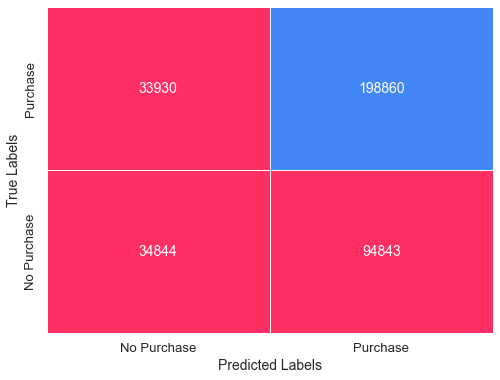

In [56]:

# Calculate the confusion matrix
mcm = confusion_matrix(ytest, Tree_predictions)

# Create a custom color palette mixing red and blue
colors = ["#ff2e63", "#4287f5"]  # Redish-pink for no purchase, Blue for purchase
cmap = sns.color_palette(colors)

# Create the confusion matrix heatmap with customized labels and colors
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(mcm, annot=True, fmt="d", cmap=cmap, cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'])  # Add customized x-axis labels
plt.yticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'])  # Add customized y-axis labels
plt.gca().invert_yaxis()  # Invert y-axis for intuitive visualization
plt.show()


In [57]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=20, random_state=23)  # You can adjust n_estimators and other hyperparameters

In [58]:
rf_model.fit(xtrain, ytrain)
RF_predictions = rf_model.predict(xtest)


In [66]:
lass_report = classification_report(ytest, RF_predictions)
print(lass_report)

              precision    recall  f1-score   support

           0       0.54      0.19      0.28    129687
           1       0.67      0.91      0.77    232790

    accuracy                           0.65    362477
   macro avg       0.60      0.55      0.52    362477
weighted avg       0.62      0.65      0.59    362477



In [67]:
RF_accuracy_score=accuracy_score(ytest,RF_predictions)
RF_precision=precision_score(ytest,RF_predictions)
RF_recall=recall_score(ytest,RF_predictions)
RF_f1_score=f1_score(ytest,RF_predictions)

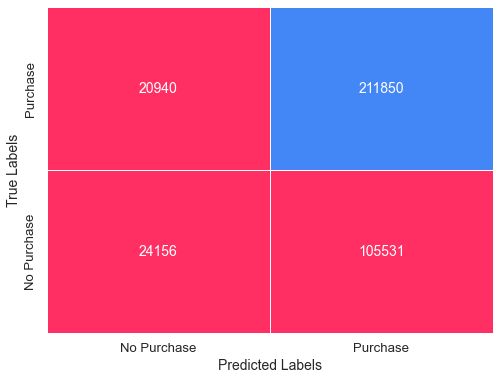

In [70]:


# Calculate the confusion matrix
cm = confusion_matrix(ytest, RF_predictions)

# Create a custom color palette mixing red and blue
colors = ["#ff2e63", "#4287f5"]  # Redish-pink for no purchase, Blue for purchase
cmap = sns.color_palette(colors)

# Create the confusion matrix heatmap with customized labels and colors
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'])  # Add customized x-axis labels
plt.yticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'])  # Add customized y-axis labels
plt.gca().invert_yaxis()  # Invert y-axis for intuitive visualization
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9992\2129003242.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm)


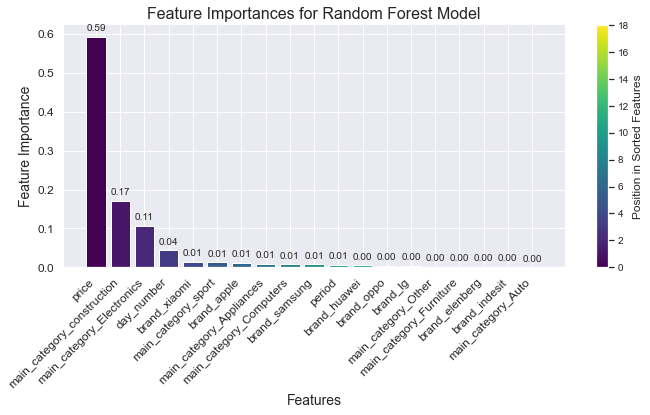

In [72]:
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_features)))

# Create the feature importance plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_features, sorted_importances, color=colors)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)
plt.title('Feature Importances for Random Forest Model', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add values on top of the bars
for bar, imp in zip(bars, sorted_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{imp:.2f}', ha='center', va='bottom', fontsize=10)

# Add legend indicating color gradient
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=len(sorted_features)-1))
sm.set_array([])  # Fake the empty array
cbar = plt.colorbar(sm)
cbar.set_label('Position in Sorted Features', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()


In [63]:
# !pip install xgboost


In [73]:
from xgboost import XGBClassifier


In [74]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
xgb_model.fit(xtrain, ytrain)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [75]:
xg_predictions = xgb_model.predict(xtest)

In [76]:
lass_report = classification_report(ytest, xg_predictions)
print(lass_report)

              precision    recall  f1-score   support

           0       0.55      0.15      0.24    129687
           1       0.66      0.93      0.77    232790

    accuracy                           0.65    362477
   macro avg       0.61      0.54      0.51    362477
weighted avg       0.62      0.65      0.58    362477



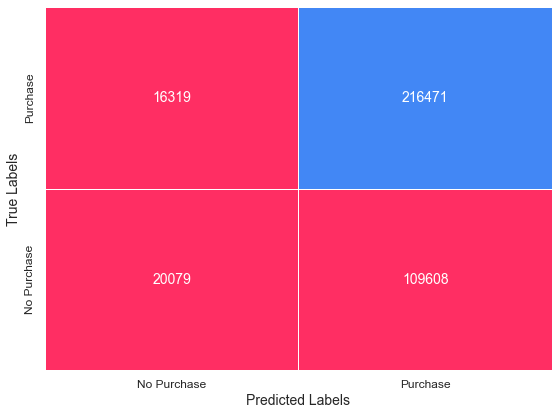

In [85]:

# Calculate the confusion matrix
cm = confusion_matrix(ytest, xg_predictions)

# Create a custom color palette mixing red and blue
colors = ["#ff2e63", "#4287f5"]  # Redish-pink for no purchase, Blue for purchase
cmap = sns.color_palette(colors)

# Create the confusion matrix heatmap with customized design
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
            annot_kws={"size": 14}, linewidths=0.5)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'], fontsize=12)  # Add customized x-axis labels
plt.yticks(np.arange(2) + 0.5, ['No Purchase', 'Purchase'], fontsize=12)  # Add customized y-axis labels
plt.gca().invert_yaxis()  # Invert y-axis for intuitive visualization
plt.tight_layout()
plt.show()


In [79]:
xg_accuracy_score=accuracy_score(ytest,xg_predictions)
xg_precision=precision_score(ytest,xg_predictions)
xg_recall=recall_score(ytest,xg_predictions)
xg_f1_score=f1_score(ytest,xg_predictions)

In [80]:

data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": [LR_accuracy_score, LR_precision, LR_recall, LR_f1_score],
    "Decision Tree": [Tree_accuracy_score, Tree_precision, Tree_recall, Tree_f1_score],
    "Random Forest": [RF_accuracy_score, RF_precision, RF_recall, RF_f1_score],
    "xg Boost": [xg_accuracy_score, xg_precision, xg_recall, xg_f1_score]

}
metric_table = pd.DataFrame(data)
metric_table

,Metric,Logistic Regression,Decision Tree,Random Forest,xg Boost
0,Accuracy,0.647528,0.644742,0.651092,0.652593
1,Precision,0.656106,0.677079,0.667494,0.663861
2,Recall,0.948116,0.854246,0.910048,0.929898
3,F1-Score,0.775534,0.755414,0.770124,0.774675


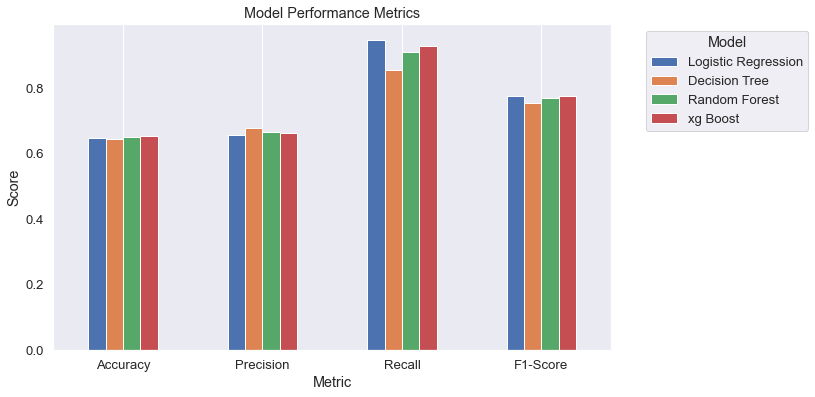

In [81]:
ax = metric_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='y')

# Move the legend outside the chart box
xtick_labels = ['Metric 1', 'Metric 2', 'Metric 3'] 
# Replace with your actual labels
xtick_labels= metric_table['Metric'].unique()
plt.xticks(range(len(xtick_labels)), xtick_labels, rotation=0)  

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

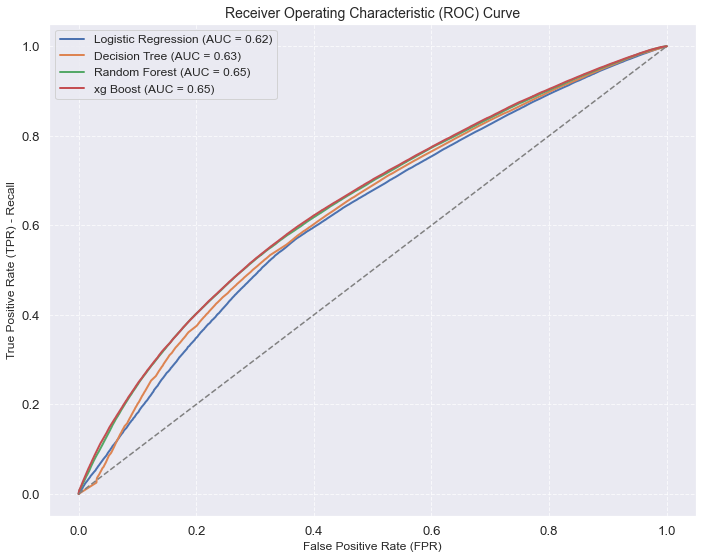

In [84]:
logreg_probs = logr.predict_proba(xtest)[:, 1]
dt_probs = decision_tree.predict_proba(xtest)[:, 1]
rf_probs = rf_model.predict_proba(xtest)[:, 1]
xg_probs = xgb_model.predict_proba(xtest)[:, 1]


# Calculate ROC curves and AUC scores for each model
fpr_logreg, tpr_logreg, _ = roc_curve(ytest, logreg_probs)
fpr_dt, tpr_dt, _ = roc_curve(ytest, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(ytest, rf_probs)
fpr_xg, tpr_xg, _ = roc_curve(ytest, xg_probs)


auc_logreg = roc_auc_score(ytest, logreg_probs)
auc_dt = roc_auc_score(ytest, dt_probs)
auc_rf = roc_auc_score(ytest, rf_probs)
auc_xg = roc_auc_score(ytest, xg_probs)

# Create a cool ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot(fpr_xg, tpr_xg, label=f'xg Boost (AUC = {auc_xg:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) - Recall', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()